# Sınıflandırma Problemleri

**Yapacağımız şey şu, şu boy, kilo, yaş'a sahip birey kadındır. Başka boy, kilo, yaş'a sahip bireyler erkektir vb. şeklinde sınıflandırma yapacağız**

****

# Lojistik Regresyon(Logistic Regression)

**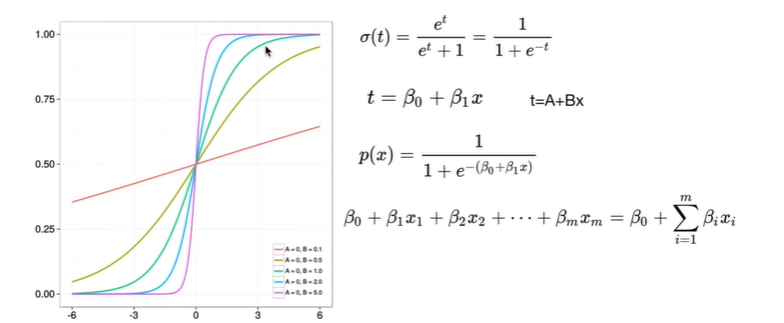**


**Görüldüğü gibi S'ye benzeyen bir şey çizilir. Mesela diyelim kilo üzerinden kadın(0) erkek(1) olup olmayacağını bulacağız. Üst çizgi erkek olduğunu, alt çizgimsi yer ise kadın olduğunu söyler.**

**Bir doğru da tam bir atlama da lojistik regresyonla ifade edilebilir!**

**Ancak küçük yaşlı insanların kilosu da küçük olacak. Yani erkek de olsa ortadan ayırma yaptığımız zaman kadın tarafında görülebilir. Onun için onlar outlier sayılır.**

**Formüle göre B değeri arttıkça fonksiyon doğruya yaklaşır. Azaldıkça daha keskin olur.**

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [58]:
datas = pd.read_csv('veriler.csv')
datas

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e
5,tr,180,90,30,e
6,tr,190,80,25,e
7,tr,175,90,35,e
8,tr,177,60,22,k
9,us,185,105,33,e


In [59]:
#boy, kilo ve yaştan cinsiyet tahmini yapmaya çalışacağız
bky = datas.iloc[:, 1:4]
cins = datas.iloc[:, -1]

In [60]:
#bölme işlemi yapıyoruz. Train-test split 
#daha sonra eğitiyoruz. xtraine fit transfrom yap. yani öğren anlamında 
#ancak xtest için yeniden öğrenme, üst tarafta öğrendiğin gibi transfrom et
xtrain, xtest, ytrain, ytest = train_test_split(bky, cins, test_size=0.33, random_state=0)
ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

In [61]:
#logisticregression objesi, xtrain ve ytrainden bilgileri alıp fit ediyor(öğreniyor)
lr = LogisticRegression(random_state=0)
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)
print(ypred)
print(ytest)
#tam tersi :D:D:D

['e' 'e' 'e' 'e' 'k' 'e' 'e' 'e']
20    k
10    k
14    k
13    k
1     e
21    k
11    k
19    k
Name: cinsiyet, dtype: object


# Karmaşıklık Matrisi

**Bu matrise göre bizim bir gerçek değerlerimiz bir de tahmin değerlerimiz var. Mesela korona olan birine pozitif diyebiliriz, doğru tahmindir. Ancak negatif de diyebiliriz, yanlış tahmindir. Korona olmayan birine pozitif diyebiliriz, yanlış tahmin. Negatif de diyebiliriz, doğru tahmin. Hatalı pozitif, hatalı negatif olayı gibi düşünülebilir.**

**Bu örnek için cevap evet veya hayır olabileceği için 2x2'lik matris ortaya çıkar. Ancak araba markası vb. gibi örneklerde matrisin boyutu artar.**

**Bu matrise göre diagonda olanlar bize başarıyı verir, diğer taraflar hatamızı gösterir.**

**Pozitif olup da pozitif dediğimiz değerler ile negatif olup da negatif dediğimiz değerler bizim doğru tahminlerimizdir. Bu tahminlerin toplamı ile toplam tahmin sayımıza bölersek yüzde kaçını doğru sınıflandırdığımızı bulabiliriz.**

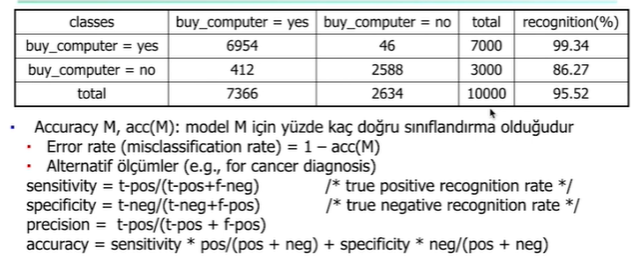

**Bu tabloya göre bakarsak (0,0) kısmı ile (1,1) kısmı bizim doğru tahminlerimizdir. Onların toplamını toplama bölersek accuracy'i bulmuş oluruz.**

In [62]:
#tahminimiz ve gerçek değerler arasında bir confusion matrix oluşturuyoruz
cm = confusion_matrix(ytest, ypred)
cm
#yani yanlış sınıflandırma yapmışız. 0'ların olduğu yerler bizim doğru sınıflandırma yaptığımız yerlerdir. 
#Ancak 0 olmaması lazım.


array([[0, 1],
       [7, 0]], dtype=int64)

In [63]:
#şimdi ise oulierları yani yanlışlığa neden olan çocukları çıkaralım. Öyle başarı oranımıza bakalım.
bky1 = datas.iloc[5:, 1:4]
cins1 = datas.iloc[5:, -1]


In [64]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(bky1, cins1, test_size=0.33, random_state=0)
sc = StandardScaler()
xtrain1 = sc.fit_transform(xtrain1)
xtest1 = sc.transform(xtest1)

In [71]:
lr1 = LogisticRegression(random_state=0)
lr1.fit(xtrain1, ytrain1)
ypred1 = lr1.predict(xtest1)
print(ypred1)
print(ytest1)
#doğruluk oranı baya arttı

['e' 'k' 'k' 'k' 'e' 'e']
6     e
11    k
13    k
14    k
18    e
9     e
Name: cinsiyet, dtype: object


In [67]:
cm1 = confusion_matrix(ytest1, ypred1)
cm1
#görüldüğü gibi diagonlar 0 değil

array([[3, 0],
       [0, 3]], dtype=int64)